# Regresión logística y descenso del gradiente 

## Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Base de datos 

In [3]:
pathfile1 = '../data/4_1_data.csv'

In [4]:
data = pd.read_csv(pathfile1, delimiter = ',')
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.tail()

,score-1,score-2,label
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## Función de coste

<img src= "../img/f_coste.PNG">

## Derivada de la función de coste 

<img src= "../img/derivada_f_coste.PNG">

## Ecuacion para Descenso de Gradiente

<img src = "../img/desc_grad.PNG">

In [7]:
#Se crean dos matrices, una para los valores de scores y otra para los valores de results.
scores = data[['score-1', 'score-2']].values
results = data['label'].values

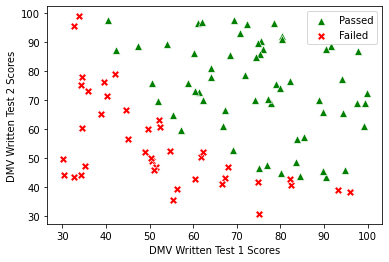

In [43]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show();

Definimos la función sigmoide

In [148]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))  #Se realiza ya que se trata de una función que da valores 1 o 0

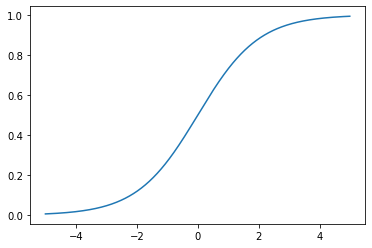

In [45]:
x = np.arange(-5, 5, 0.01)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

## Definición de la función de costes

In [38]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

## Inicialización del coste y el gradiente 

In [108]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [40]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

## Gráfica del descenso del gradiente

### Términos básicos
 - Size of Steps took in any direction = Learning rate
 - Gadget tells you height = Cost function
 - The direction of your steps = Gradients

In [109]:
theta, costs = gradient_descent(X, y, theta_init, alpha = 1, iterations = 200)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.2048938203603661


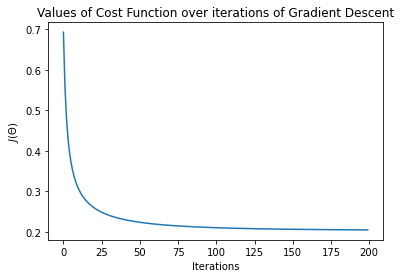

In [110]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

Para un ratio de aprendizaje de 1, se observa que aproximadamente necesita unas 100 iteracciones en los pasos que da la función del descenso del gradiente para minimizar el coste de la función. Para ello se podría reducir el número de iteracciones a 150 para que computacionalmente sea más ligero.

### Descenso del gradiente con un menor alpha.

In [104]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [105]:
theta, costs = gradient_descent(X, y, theta_init, alpha = 0.01, iterations = 10000)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

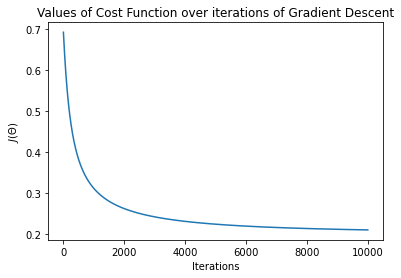

In [107]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

Ante un menor ratio de aprendizaje, se observa que se necesitan muchas más iteracciones en la minimización de la función de costes para poder llegar al mínimo. Esto es debido a que al ser pasos más pequeños los que da para llegar al mínimo, necesita más iteracciones, por lo que computacionalmente es más costoso.

### Descenso del gradiente para un alpha mayor

In [136]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [137]:
theta, costs = gradient_descent(X, y, theta_init, alpha = 20, iterations = 10)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[2.01128429]
 [4.62253756]
 [4.33548125]]
Resulting cost: 0.20610951535920893


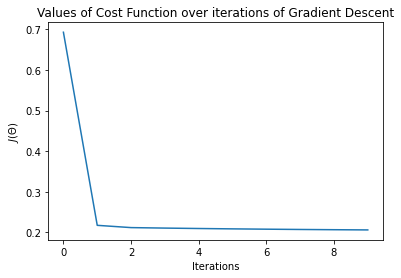

In [138]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

Para un ratio de aprendizaje mayor, en este caso de 20, se observa que se necesitan muchas menos iteracciones para llegar al mínimo de la función de costes. En este caso, se puede decir que estos valores de alpha y de iteracciones es más óptimo ya que computacionalmente tardará menos, pero hay que tener cuidado ya que si te pasas con el ratio de aprendizaje, puedes generar que no encuentre nunca el mínimo ya que los "pasos" que da la función del descenso del gradiente van a ir dando "tumbos" sin encontrar el púnto mínimo.

### Descenso del gradiente para un alpha demasiado grande

In [133]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [134]:
theta, costs = gradient_descent(X, y, theta_init, alpha = 50, iterations = 200)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[ 4.13248129]
 [ 9.40549494]
 [10.34662687]]
Resulting cost: 0.3706193609337323


<ipython-input-38-f90cc1853420>:4: RuntimeWarning: divide by zero encountered in log
  error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
<ipython-input-38-f90cc1853420>:4: RuntimeWarning: invalid value encountered in multiply
  error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))


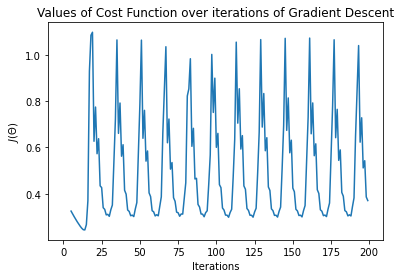

In [135]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

En este caso se puede observar como al aumentar excesivamente el valor del ratio de aprendizaje, los valores de la función de costes no encuentran un punto mínimo, ya que los pasos que da son demasiado grandes, y cuando se encuentra con un gradiente de pendiente negativa que le indica que debe seguir bajando, al siguiente paso se encuentra con un gradiente de pendiente positiva, que le muestra que se ha pasado del punto mínimo, a lo que vuelve hacia atras de nuevo pero al ser un paso tan grande, se vuelve a pasar del punto mínimo, y así consecutivamente.

Esto demuestra que el riesgo de aumentar el valor del ratio de aprendizaje para una coste de computación menor no tiene sentido, ya que la diferencia entre 10 iteracciones y 200 iteracciones no varía mucho el tiempo de carga para el ordenador, por lo que es mejor buscar un valor medio con un mayor número de iteracciones para así no arriesgarse a tener un error en la búsqueda del mínimo coste de la función.

### Descenso del gradiente para un alpha mayor

In [139]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [140]:
theta, costs = gradient_descent(X, y, theta_init, alpha = 1, iterations = 2000)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.71844426]
 [3.99277645]
 [3.72512571]]
Resulting cost: 0.2034977015995303


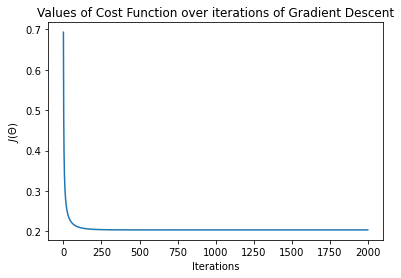

In [141]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

Para un número mayor de iteracciones en la función, el coste computacional aumenta y, en este caso, no tiene sentido ya que alcanza el mínimo aproximadamente sobre las 100 iteracciones.
Las iteracciones tienen que ir a la par con el ratio de aprendizaje que le asociemos, a menor ratio de aprendizaje necesitará de más iteracciones para alcanzar el mínimo, aumentando el coste computacional.
A mayor ratio de aprendizaje se necesita de menos iteracciones para alcanzar el mínimo, siempre teniendo en cuenta el riesgo que se corre de no encontrar nunca el mínimo coste.

### Bajas iteracciones para un bajo alpha

In [145]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [146]:
theta, costs = gradient_descent(X, y, theta_init, alpha = 0.1, iterations = 50)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[0.30987381]
 [0.86999601]
 [0.77818169]]
Resulting cost: 0.38381057469457497


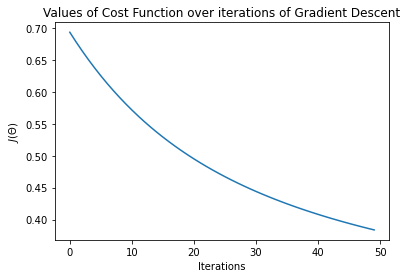

In [147]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

Se observa como para un alpha bajo y unas iteracciones bajas, no alcanza el mínimo, ya que le indicamos que pare a las 50 iteracciones y no es suficiente para ese ratio de aprendizaje estipulado para alcanzar el mínimo.

# Referencias

 - https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
 - https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb
 - https://www.pakin.lat/machine-learning-regresion-lineal-ecuacion-normal-descenso-gradiente-python